# Imports and web scraping

In [1]:
import requests

from bs4 import BeautifulSoup

In [32]:
url = 'https://www.theinfatuation.com/new-york/reviews?sort=&page=1'

## Can we get what we want: The slugs

In [33]:
response = requests.get(url)

#look at status code
response.status_code

200

In [4]:
#Create Soup object:

soup = BeautifulSoup(response.content, 'lxml')

In [18]:
#Method to find all the restaurant names
first = soup.find_all({'a': {'class': 'worthy-block__title'}})
first

[<a class="citypicker_list__link" href="/atlanta">Atlanta</a>,
 <a class="citypicker_list__link" href="/austin">Austin</a>,
 <a class="citypicker_list__link" href="/boston">Boston</a>,
 <a class="citypicker_list__link" href="/chicago">Chicago</a>,
 <a class="citypicker_list__link" href="/denver">Denver</a>,
 <a class="citypicker_list__link" href="/london">London</a>,
 <a class="citypicker_list__link" href="/los-angeles">Los Angeles</a>,
 <a class="citypicker_list__link" href="/new-york">New York</a>,
 <a class="citypicker_list__link" href="/philadelphia">Philadelphia</a>,
 <a class="citypicker_list__link" href="/san-francisco">San Francisco</a>,
 <a class="citypicker_list__link" href="/seattle">Seattle</a>,
 <a class="citypicker_list__link" href="/washington-dc">Washington DC</a>,
 <a class="citypicker_list__link" href="https://theinfatuation.com/barcelona/guides/best-barcelona-restaurants">Barcelona</a>,
 <a class="citypicker_list__link" href="https://theinfatuation.com/cape-town/guid

In [20]:
slugs = []
for i in first:
    slugs.append(i.get('href'))
    

In [21]:
slugs

['/atlanta',
 '/austin',
 '/boston',
 '/chicago',
 '/denver',
 '/london',
 '/los-angeles',
 '/new-york',
 '/philadelphia',
 '/san-francisco',
 '/seattle',
 '/washington-dc',
 'https://theinfatuation.com/barcelona/guides/best-barcelona-restaurants',
 'https://theinfatuation.com/cape-town/guides/best-cape-town-restaurants',
 'https://www.theinfatuation.com/charleston/guides/charleston-restaurants',
 'https://www.theinfatuation.com/dallas/guides/dallas-restaurants',
 'https://theinfatuation.com/detroit/guides/detroit-restaurants',
 'https://theinfatuation.com/hong-kong/guides/best-hong-kong-restaurants',
 'https://theinfatuation.com/houston/guides/houston-restaurants',
 'https://theinfatuation.com/melbourne/guides/best-melbourne-restaurants',
 'https://theinfatuation.com/mexico-city/guides/best-mexico-city-restaurants',
 'https://theinfatuation.com/miami/guides/miami-restaurants',
 'https://www.theinfatuation.com/minneapolis/guides/minneapolis-restaurants',
 'https://www.theinfatuation.co

In [22]:
new_slugs = []
for i in slugs:
    if 'review' in i:
        new_slugs.append(i)
new_slugs

['/new-york/reviews',
 '/new-york/reviews/gato',
 '/new-york/reviews/gato',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/gato',
 '/new-york/reviews/kyma',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/reviews',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/gato',
 '/new-york/reviews/gato',
 '/new-york/reviews/gato',
 '/new-york/reviews/gato',
 '/new-york/reviews/gato',
 '/new-york/reviews/gato',
 '/new-york/reviews/kyma',
 '/new-york/reviews/kyma',
 '/new-york/reviews/kyma',
 '/new-york/reviews/kyma',
 '/new-york/reviews/kyma',
 '/new-york/reviews/kyma',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/samesa',
 '/new-york/reviews/s

In [49]:
new_slugs = [i for i in new_slugs if len(i) >17]

In [51]:
new_slugs = list(set(new_slugs))
new_slugs

['/new-york/reviews/atomix',
 '/new-york/reviews/the-polynesian',
 '/new-york/reviews/misi',
 '/new-york/reviews/toriko-ny',
 '/new-york/reviews/2nd-floor-bar-essen',
 '/new-york/reviews/pig-and-khao',
 '/new-york/reviews/u-gu',
 '/new-york/reviews/bernies',
 '/new-york/reviews/gato',
 '/new-york/reviews/blanca',
 '/new-york/reviews/shabushabu-macoron',
 '/new-york/reviews/samesa',
 '/new-york/reviews/adda',
 '/new-york/reviews/bar-beau',
 '/new-york/reviews/general-debs',
 '/new-york/reviews/kyma']

#### For each page:

In [53]:
url_page = 'https://www.theinfatuation.com' + '/new-york/reviews/atomix'

response = requests.get(url_page)

#look at status code
response.status_code

200

In [54]:
soup_page = BeautifulSoup(response.content, 'lxml')

[<div class="" id="site-wrapper">
 <div class="top-banner">
 <div class="desktop">
 <div class="adslot" data-dfp="Site_Leaderboard" data-sizes="[[728, 90]]" id="div-gpt-ad-1367616030-0"></div>
 </div>
 <div class="mobile">
 <div class="adslot" data-dfp="Site_Leaderboard" data-sizes="[[320, 50]]" id="div-gpt-ad-1367616030-0m"></div>
 </div>
 </div>
 <div class="header_citypicker">
 <div class="header_citypicker__overlay" id="citypicker-overlay"></div>
 <div class="header_citypicker-wrapper" id="citypicker-wrapper">
 <button class="citypicker_dismiss__btn" id="citypicker_dismiss__btn">
 <svg class="citypicker_dismiss__icon" height="48" viewbox="0 0 48 48" width="48" xmlns="http://www.w3.org/2000/svg">
 <g fill="none" fill-rule="evenodd">
 <rect height="48" width="48"></rect>
 <path d="M26.8284271,24 L41.4142136,38.5857864 L38.5857864,41.4142136 L24,26.8284271 L9.41421356,41.4142136 L6.58578644,38.5857864 L21.1715729,24 L6.58578644,9.41421356 L9.41421356,6.58578644 L24,21.1715729 L38.5857
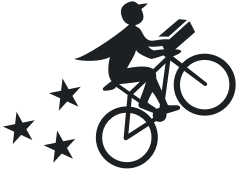
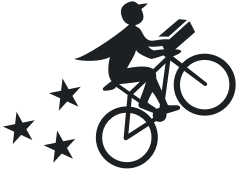
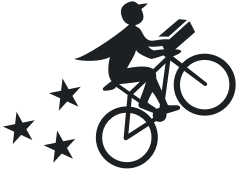
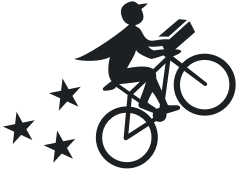
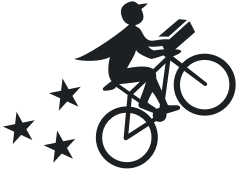
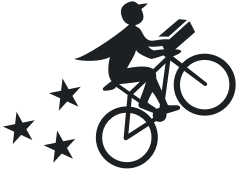
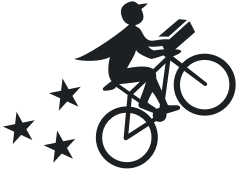
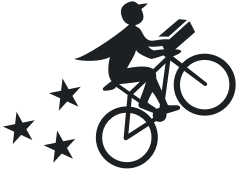
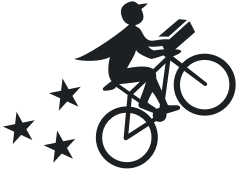
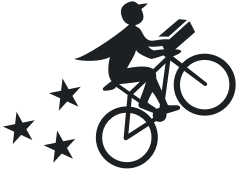
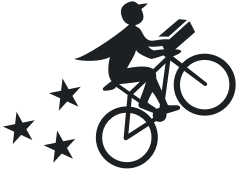
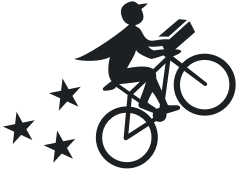
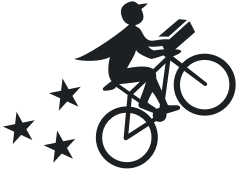
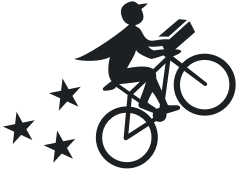
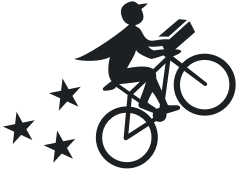
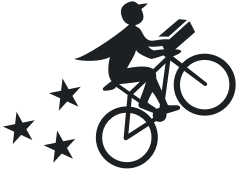
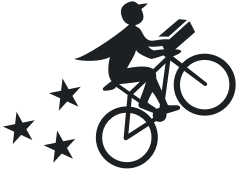
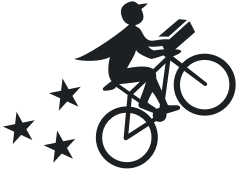
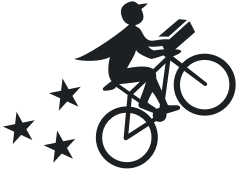

In [56]:
soup_page.find_all({'div': {'class': 'review-title__title-section'}})

In [ ]:

for i in soup_page.find_all({'div': {'class': 'review'}}):
    slugs.append(i.get('href'))

## Iterate through pages 1 through 52 to get ~ 900 slugs

In [40]:
pages = list(range(1, 53))

In [45]:
slugs = []
new_slugs = []

for x in pages:
    url_loop = 'https://www.theinfatuation.com/new-york/reviews?sort=&page=' + str(x)
    response_loop = requests.get(url_loop)
    #look at status code
    response_loop.status_code
    print(response_loop)
    
    #create beautiful soup object
    soup_loop = BeautifulSoup(response.content, 'lxml')
    
    #find all
    
    for i in soup_loop.find_all({'a': {'class': 'worthy-block__title'}}):
        slugs.append(i.get('href'))
        
    #only keep reviews of specific 
    for i in slugs:
        if 'review' in i:
            new_slugs.append(i)
            
new


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


KeyboardInterrupt: 

## Use list of slugs to query each page and pull the reviews, cost, rating, location and type